In [26]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manju\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\manju\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\manju\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\manju\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\manju\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
# read data 

df = pd.read_excel('Samsung-Galaxy-S22Review_CleansedData.xlsx')
df.shape

(97, 8)

In [3]:
# Create index for the dataframe

#index = pd.Index(range(1, 98, 1))

In [4]:
# dataset

#df.set_index(index)
#df.index.name = 'Index'
df

,Index,Star-rating,Name,Reviewer Profile Url,Review Title,Review Content,images,Date
0,1,4,Alex Lascar,https://www.amazon.co.uk/gp/customer-reviews/R...,Is the USA single SIM made for. No dual sim a...,Burgundy 512Gb\nNo dual sim. Is the one made f...,https://m.media-amazon.com/images/I/61pLbh4o8R...,Reviewed in the United Kingdom on 20 August 2022
1,2,4,Manole Danut,https://www.amazon.co.uk/gp/customer-reviews/R...,"Good phone, mediocre battery.",The overall product is good. When opening the ...,NaN,Reviewed in the United Kingdom on 25 July 2022
2,3,5,Bradley Clarke,https://www.amazon.co.uk/gp/customer-reviews/R...,Unbelievably good phone,This was what felt like an insane upgrade from...,NaN,Reviewed in the United Kingdom on 9 August 2022
3,4,5,S,https://www.amazon.co.uk/gp/customer-reviews/R...,Fabulous phone,Bought the Galaxy S22 Ultra as I wanted a came...,NaN,Reviewed in the United Kingdom on 23 August 2022
4,5,4,qais,https://www.amazon.co.uk/gp/customer-reviews/R...,doesn't deserve the price,the phone is good but absolutely doesn't deser...,NaN,Reviewed in the United Kingdom on 23 August 2022
...,...,...,...,...,...,...,...,...
92,93,5,Adam,https://www.amazon.co.uk/gp/customer-reviews/R...,"So far, it's really great",I purchased this phone after having difficulti...,NaN,Reviewed in the United Kingdom on 10 May 2022
93,94,5,Richard,https://www.amazon.co.uk/gp/customer-reviews/R...,Great phone 📱,Great,NaN,Reviewed in the United Kingdom on 10 May 2022
94,95,5,Cochise664,https://www.amazon.co.uk/gp/customer-reviews/R...,Excellent well made quality product.,"As you would expect from Samsung, the S22 Ultr...",NaN,Reviewed in the United Kingdom on 24 April 2022
95,96,3,Chris,https://www.amazon.co.uk/gp/customer-reviews/R...,Not much difference between the s21 ultra,This has to be the worst device ive ever owned...,NaN,Reviewed in the United Kingdom on 11 March 2022


In [5]:
# Ratings
df['Star-rating']

0     4
1     4
2     5
3     5
4     4
     ..
92    5
93    5
94    5
95    3
96    1
Name: Star-rating, Length: 97, dtype: int64

In [6]:
# Count of star rating
df['Star-rating'].value_counts()

5    52
1    17
4    13
3     9
2     6
Name: Star-rating, dtype: int64

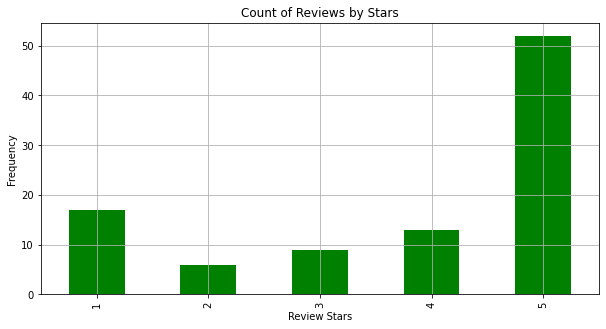

In [7]:
ax = df['Star-rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5), color = 'g')
ax.set_xlabel('Review Stars')
ax.set_ylabel('Frequency')
plt.grid()
plt.show()

In [8]:
example = df['Review Content'][40]
example

'This battery is really too weak.The rest is acceptable, although Bixby is misundestanding'

In [9]:
tokens = nltk.word_tokenize(example)
#tokens[:]
tokens

['This',
 'battery',
 'is',
 'really',
 'too',
 'weak.The',
 'rest',
 'is',
 'acceptable',
 ',',
 'although',
 'Bixby',
 'is',
 'misundestanding']

In [10]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('battery', 'NN'),
 ('is', 'VBZ'),
 ('really', 'RB'),
 ('too', 'RB'),
 ('weak.The', 'JJ'),
 ('rest', 'NN'),
 ('is', 'VBZ'),
 ('acceptable', 'JJ'),
 (',', ',')]

In [11]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  battery/NN
  is/VBZ
  really/RB
  too/RB
  weak.The/JJ
  rest/NN
  is/VBZ
  acceptable/JJ
  ,/,
  although/IN
  (PERSON Bixby/NNP)
  is/VBZ
  misundestanding/VBG)


# Step 1. VADER Seniment Scoring

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [13]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [14]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'compound': 0.3182}

In [15]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [16]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review Content']
    myid = row['Index']
    res[myid] = sia.polarity_scores(text)

In [23]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Index'})
vaders = vaders.merge(df, how='left')

In [24]:
vaders.head()

,Index,neg,neu,pos,compound,Star-rating,Name,Reviewer Profile Url,Review Title,Review Content,images,Date
0,1,0.068,0.900,0.032,-0.2235,4,Alex Lascar,https://www.amazon.co.uk/gp/customer-reviews/R...,Is the USA single SIM made for. No dual sim a...,Burgundy 512Gb\nNo dual sim. Is the one made f...,https://m.media-amazon.com/images/I/61pLbh4o8R...,Reviewed in the United Kingdom on 20 August 2022
1,2,0.000,0.895,0.105,0.9432,4,Manole Danut,https://www.amazon.co.uk/gp/customer-reviews/R...,"Good phone, mediocre battery.",The overall product is good. When opening the ...,NaN,Reviewed in the United Kingdom on 25 July 2022
2,3,0.052,0.812,0.136,0.9514,5,Bradley Clarke,https://www.amazon.co.uk/gp/customer-reviews/R...,Unbelievably good phone,This was what felt like an insane upgrade from...,NaN,Reviewed in the United Kingdom on 9 August 2022
3,4,0.000,0.853,0.147,0.9459,5,S,https://www.amazon.co.uk/gp/customer-reviews/R...,Fabulous phone,Bought the Galaxy S22 Ultra as I wanted a came...,NaN,Reviewed in the United Kingdom on 23 August 2022
4,5,0.000,0.736,0.264,0.8230,4,qais,https://www.amazon.co.uk/gp/customer-reviews/R...,doesn't deserve the price,the phone is good but absolutely doesn't deser...,NaN,Reviewed in the United Kingdom on 23 August 2022


# Plot VADER results

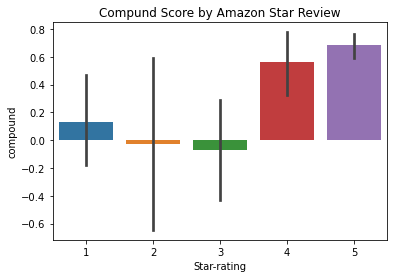

In [27]:
ax = sns.barplot(data=vaders, x='Star-rating', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

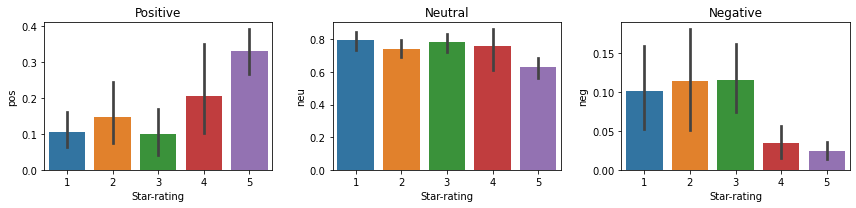

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Star-rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Star-rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Star-rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Step 3. Roberta Pretrained Model

In [35]:
!pip install transformers


     ---------------------------------------- 4.7/4.7 MB 6.5 MB/s eta 0:00:00
     -------------------------------------- 120.7/120.7 kB 7.4 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 7.2 MB/s eta 0:00:00


In [36]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax